# P4



## Exploratory Data Analysis

In [1]:
# %matplotlib widget

import pandas as pd
import pandasql as psql
from pandasql import sqldf
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
customers = pd.read_csv('dataset/olist_customers_dataset.csv')
geolocation = pd.read_csv('dataset/olist_geolocation_dataset.csv')
order_items = pd.read_csv('dataset/olist_order_items_dataset.csv')
order_payments = pd.read_csv('dataset/olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('dataset/olist_order_reviews_dataset.csv')
orders = pd.read_csv('dataset/olist_orders_dataset.csv')
products = pd.read_csv('dataset/olist_products_dataset.csv')
sellers = pd.read_csv('dataset/olist_sellers_dataset.csv')
product_category_name = pd.read_csv('dataset/product_category_name_translation.csv')



### Locations

In [3]:
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [4]:
geolocation = geolocation.groupby('geolocation_city')[['geolocation_lat', 'geolocation_lng']].mean().reset_index()
geolocation.set_index('geolocation_city')

,geolocation_lat,geolocation_lng
geolocation_city,,
* cidade,-25.571748,-49.334374
...arraial do cabo,-22.969370,-42.029834
4o. centenario,-24.271860,-53.069433
4º centenario,-24.279801,-53.074723
abadia de goias,-16.767063,-49.438089
...,...,...
áurea,-27.695009,-52.055076
ângulo,-23.195024,-51.917294
érico cardoso,-13.393047,-42.134282


In [5]:
# pipo, citya_lat, citya_lng = list(zip(geolocation[geolocation.geolocation_city == 'abare']))
city_coord = geolocation[geolocation.geolocation_city == 'abare'].to_numpy()
city_coord[0][1]
# citya_lat = citya_coord['geolocation_lat']
# citya_lng = citya_coord['geolocation_lng']
# citya_lat


-8.689967452179038

In [6]:
from haversine import haversine, Unit

olist_hq_loc = (-25.430296283573938, -49.29199547244041) # olist head quarter position

def position(row):
    return haversine(olist_hq_loc, (row['geolocation_lat'], row['geolocation_lng']), unit=Unit.KILOMETERS)

def distance_btw_cities(citya, cityb):
    citya_coord = geolocation[geolocation.geolocation_city == citya].to_numpy()
    # print(citya_coord)
    cityb_coord = geolocation[geolocation.geolocation_city == cityb].to_numpy()
    # print(cityb_coord)
    return haversine((citya_coord[0][1], citya_coord[0][2]), (cityb_coord[0][1], cityb_coord[0][2]))

def haversine_vectorize(lon1, lat1, lon2, lat2):

    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    newlon = lon2 - lon1
    newlat = lat2 - lat1

    haver_formula = np.sin(newlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(newlon/2.0)**2

    dist = 2 * np.arcsin(np.sqrt(haver_formula ))
    km = 6367 * dist #6367 for distance in KM for miles use 3958
    return np.around(km, 0)



In [7]:
distance_btw_cities('abare', 'abrantes')

470.724756693975

### Customers


In [8]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [9]:
# use customer_unique_id for joining

print(customers['customer_unique_id'].nunique())
print(customers['customer_id'].nunique())

# customers = customers.merge(geolocation, left_on='customer_city', right_on='geolocation_city', how='left')
customers.drop('customer_zip_code_prefix', axis=1, inplace=True)
customers.drop('customer_state', axis=1, inplace=True)
# customers.drop('geolocation_city', axis=1, inplace=True)


96096
99441


### Products

In [10]:
#  join on product_id
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [11]:
products['product_category_name'].nunique()

73

In [12]:
products.drop('product_name_lenght', axis=1, inplace=True)
products.drop('product_description_lenght', axis=1, inplace=True)
products.drop('product_photos_qty', axis=1, inplace=True)
products['product_volume'] = products['product_length_cm'] * products['product_height_cm'] * products['product_width_cm']
products.drop('product_length_cm', axis=1, inplace=True)
products.drop('product_height_cm', axis=1, inplace=True)
products.drop('product_width_cm', axis=1, inplace=True)

### Order Items

In [13]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [20]:
order_items.groupby(['order_id'])[['order_id', 'order_item_id']].count().sort_values(by='order_item_id' , ascending=False)

,order_id,order_item_id
order_id,,
8272b63d03f5f79c56e9e4120aec44ef,21,21
1b15974a0141d54e36626dca3fdc731a,20,20
ab14fdcfbe524636d65ee38360e22ce8,20,20
9ef13efd6949e4573a18964dd1bbe7f5,15,15
428a2f660dc84138d969ccd69a0ab6d5,15,15
...,...,...
5a0911d70c1f85d3bed0df1bf693a6dd,1,1
5a082b558a3798d3e36d93bfa8ca1eae,1,1
5a07264682e0b8fbb3f166edbbffc6e8,1,1


In [15]:
order_items.groupby(['seller_id'])\
    .agg({'product_id': 'count', 'price': 'sum'})\
    .reset_index()\
    .sort_values(by=['product_id', 'price'], ascending=False)\
    .rename(columns={'product_id' : 'product_id_count', 'price': 'price_sum'})

,seller_id,product_id_count,price_sum
1235,6560211a19b47992c3666cc44a7e94c0,2033,123304.83
881,4a3ca9315b744ce9f8e9374361493884,1987,200472.92
368,1f50f920176fa81dab994f9023523100,1931,106939.21
2481,cc419e0650a3c5ba77189a1882b7556a,1775,104288.42
2643,da8622b14eb17ae2831f4ac5b9dab84a,1551,160236.57
...,...,...,...
627,34aefe746cd81b7f3b23253ea28bef39,1,8.00
1370,702835e4b785b67a084280efca355756,1,7.60
373,1fa2d3def6adfa70e58c276bb64fe5bb,1,6.90
1465,77128dec4bec4878c37ab7d6169d6f26,1,6.50


In [16]:
# several sellers may exists for one single order (providing several products)
order_items.groupby(['order_id'])\
    .agg({'seller_id': 'nunique'})\
    .sort_values(by='seller_id', ascending=False)
    

,seller_id
order_id,
1c11d0f4353b31ac3417fbfa5f0f2a8a,5
cf5c8d9f52807cb2d2f0a0ff54c478da,5
8c2b13adf3f377c8f2b06b04321b0925,4
91be51c856a90d7efe86cf9d082d6ae3,4
1d23106803c48c391366ff224513fb7f,4
...,...
55e186387dc4b33d16d86a920ee7f77b,1
55e144afb3e4115f6c520fb6242cd1bf,1
55dfff244bc5d5f81d58d4148062c9b6,1


In [17]:
#  some orders have several products, so compute the overal sum for each order
order_items_grouped = order_items.groupby(['order_id'])\
    .agg({'product_id': 'count', 'price': 'sum', 'seller_id' : 'count'})\
    .reset_index()\
    .sort_values(by=['product_id', 'price'], ascending=False)\
    .rename(columns={'product_id' : 'product_id_count', 'price': 'price_sum'})

order_items_grouped


,order_id,product_id_count,price_sum,seller_id
50137,8272b63d03f5f79c56e9e4120aec44ef,21,31.80,21
10459,1b15974a0141d54e36626dca3fdc731a,20,2000.00,20
65715,ab14fdcfbe524636d65ee38360e22ce8,20,1974.00,20
25583,428a2f660dc84138d969ccd69a0ab6d5,15,982.35,15
60941,9ef13efd6949e4573a18964dd1bbe7f5,15,765.00,15
...,...,...,...,...
21805,38bcb524e1c38c2c1b60600a80fc8999,1,2.90,1
89758,e8bbc1d69fee39eee4c72cb5c969e39d,1,2.29,1
93208,f1d5c2e6867fa93ceee9ef9b34a53cbf,1,2.20,1
24174,3ee6513ae7ea23bdfab5b9ab60bffcb5,1,0.85,1


### Order Payments

In [18]:
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [19]:
print(order_payments['order_id'].nunique())
print(order_payments['payment_installments'].nunique())
print(order_payments.shape[0])

# installments = versements, join on order_id
order_payments = order_payments.groupby('order_id')['payment_installments'].max().reset_index()

print(order_payments['order_id'].nunique())
print(order_payments['payment_installments'].nunique())
print(order_payments.shape[0])

99440
24
103886
99440
24
99440


### Order Review

In [21]:
#  just keep review_score, review_creation_date, join on order_id
order_reviews.info()
order_reviews.drop('review_id', axis=1, inplace=True)
order_reviews.drop('review_comment_title', axis=1, inplace=True)
order_reviews.drop('review_comment_message', axis=1, inplace=True)
order_reviews.drop('review_answer_timestamp', axis=1, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


### Orders

In [21]:
#  join on order_id
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [22]:
orders.drop('order_status', axis=1, inplace=True)
orders.drop('order_approved_at', axis=1, inplace=True)
orders.drop('order_delivered_carrier_date', axis=1, inplace=True)
orders['order_delivered_customer_date'] = pd.to_datetime

orders['delivered_on_time'] = np.sign(orders['order_delivered_customer_date'] - orders['order_estimated_delivery_date'])
orders.drop('order_delivered_customer_date', axis=1, inplace=True)
orders.drop('order_estimated_delivery_date', axis=1, inplace=True)

# orders.drop('customer_id', axis=1, inplace=True)
# print(orders['customer_id'].nunique())
print(orders.shape[0])

TypeError: unsupported operand type(s) for -: 'str' and 'str'

### Sellers

In [23]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [24]:
sellers.drop(['seller_state', 'seller_zip_code_prefix'], axis=1, inplace=True)

## Merge datasets

In [25]:
olist = customers.merge(orders, on='customer_id', how='left')
olist = olist.merge(order_items, on='order_id', how='outer')
olist = olist.merge(order_reviews, on='order_id', how='outer')
olist = olist.merge(products, on='product_id', how='outer')
olist = olist.merge(sellers, on='seller_id', how='outer')

olist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114092 entries, 0 to 114091
Data columns (total 21 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    114092 non-null  object 
 1   customer_unique_id             114092 non-null  object 
 2   customer_city                  114092 non-null  object 
 3   order_id                       114092 non-null  object 
 4   order_purchase_timestamp       114092 non-null  object 
 5   order_approved_at              113930 non-null  object 
 6   order_delivered_carrier_date   112112 non-null  object 
 7   order_delivered_customer_date  110839 non-null  object 
 8   order_estimated_delivery_date  114092 non-null  object 
 9   order_item_id                  113314 non-null  float64
 10  product_id                     113314 non-null  object 
 11  seller_id                      113314 non-null  object 
 12  shipping_limit_date           

In [26]:
olist['order_delivered_carrier_date'] = pd.to_datetime(olist['order_delivered_carrier_date'])
olist['order_delivered_customer_date'] = pd.to_datetime(olist['order_delivered_customer_date'])
olist['order_estimated_delivery_date'] = pd.to_datetime(olist['order_estimated_delivery_date'])
olist['shipping_limit_date'] = pd.to_datetime(olist['shipping_limit_date'])
olist['review_creation_date'] = pd.to_datetime(olist['review_creation_date'])
olist['order_purchase_timestamp'] = pd.to_datetime(olist['order_purchase_timestamp'])
olist['order_approved_at'] = pd.to_datetime(olist['order_approved_at'])

In [27]:

olist.drop(['customer_id', 'order_id', 'order_item_id', 'product_id', 'seller_id'], axis=1, inplace=True)
olist.dropna(inplace=True)


In [28]:

olist.head()

,customer_unique_id,customer_city,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,price,freight_value,review_score,review_creation_date,product_category_name,product_weight_g,product_volume,seller_city
0,861eff4711a542e4b93843c6dd7febb0,franca,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2017-05-22 15:22:12,124.99,21.88,4.0,2017-05-26,moveis_escritorio,8683.0,107136.0,itaquaquecetuba
1,9eae34bbd3a474ec5d07949ca7de67c0,santarem,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19,2017-11-23 00:47:18,112.99,24.90,1.0,2017-11-29,moveis_escritorio,8683.0,107136.0,itaquaquecetuba
2,9eae34bbd3a474ec5d07949ca7de67c0,santarem,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19,2017-11-23 00:47:18,112.99,24.90,1.0,2017-11-29,moveis_escritorio,8683.0,107136.0,itaquaquecetuba
3,3c799d181c34d51f6d44bbbc563024db,nova santa rita,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,2017-05-26 09:54:04,2017-06-12,2017-05-22 22:22:56,124.99,15.62,3.0,2017-05-27,moveis_escritorio,8683.0,107136.0,itaquaquecetuba
4,23397e992b09769faf5e66f9e171a241,mage,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,2018-02-28 21:09:00,2018-03-22,2018-02-18 21:29:19,106.99,30.59,4.0,2018-03-01,moveis_escritorio,8683.0,107136.0,itaquaquecetuba


<AxesSubplot:ylabel='None'>

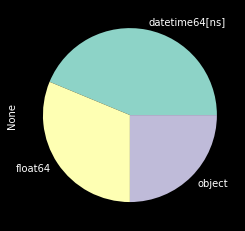

In [29]:
olist.dtypes.value_counts().plot.pie()

In [30]:
olist.select_dtypes("float")

,price,freight_value,review_score,product_weight_g,product_volume
0,124.99,21.88,4.0,8683.0,107136.0
1,112.99,24.90,1.0,8683.0,107136.0
2,112.99,24.90,1.0,8683.0,107136.0
3,124.99,15.62,3.0,8683.0,107136.0
4,106.99,30.59,4.0,8683.0,107136.0
...,...,...,...,...,...
114085,1750.00,39.02,4.0,1100.0,3000.0
114086,145.90,15.47,5.0,2250.0,7168.0
114088,49.90,22.28,5.0,200.0,8960.0
114090,135.98,88.46,5.0,3211.0,41976.0


In [31]:
olist.select_dtypes("object")

,customer_unique_id,customer_city,product_category_name,seller_city
0,861eff4711a542e4b93843c6dd7febb0,franca,moveis_escritorio,itaquaquecetuba
1,9eae34bbd3a474ec5d07949ca7de67c0,santarem,moveis_escritorio,itaquaquecetuba
2,9eae34bbd3a474ec5d07949ca7de67c0,santarem,moveis_escritorio,itaquaquecetuba
3,3c799d181c34d51f6d44bbbc563024db,nova santa rita,moveis_escritorio,itaquaquecetuba
4,23397e992b09769faf5e66f9e171a241,mage,moveis_escritorio,itaquaquecetuba
...,...,...,...,...
114085,38e482d7770a43f5929378c4dec76d5e,parnamirim,beleza_saude,niteroi
114086,393c2ace23a135d0bcc7e70167448e16,barreiras,bebidas,salvador
114088,5c22dbb9d8b5385953f2f1e6d9d115a7,jordania,pet_shop,maringa
114090,7f5f43a9394964ac51bc5d1e0204ead4,uruacu,ferramentas_jardim,sao jose dos pinhais


In [32]:
olist.select_dtypes("datetime")

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,review_creation_date
0,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2017-05-22 15:22:12,2017-05-26
1,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19,2017-11-23 00:47:18,2017-11-29
2,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19,2017-11-23 00:47:18,2017-11-29
3,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,2017-05-26 09:54:04,2017-06-12,2017-05-22 22:22:56,2017-05-27
4,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,2018-02-28 21:09:00,2018-03-22,2018-02-18 21:29:19,2018-03-01
...,...,...,...,...,...,...,...
114085,2018-08-16 15:02:31,2018-08-17 15:09:48,2018-08-20 13:22:00,2018-08-28 22:08:29,2018-09-24,2018-08-23 15:09:48,2018-08-29
114086,2018-07-20 09:42:40,2018-07-20 15:05:22,2018-07-23 11:53:00,2018-07-27 11:54:15,2018-08-14,2018-08-01 15:05:22,2018-07-28
114088,2018-08-01 18:58:49,2018-08-02 18:50:15,2018-08-03 15:39:00,2018-08-13 23:16:46,2018-08-27,2018-08-08 18:50:15,2018-08-14
114090,2018-08-18 20:59:58,2018-08-18 21:10:13,2018-08-20 16:49:00,2018-08-28 18:16:44,2018-09-10,2018-08-21 21:10:13,2018-08-29


### Univariate & Multivariate Analysis

In [33]:
# returning customers (more than one order or product), mean percentage
print(f"{((olist['customer_unique_id'].shape[0]) / (olist['customer_unique_id'].nunique()) -1)*100} %")


18.55823359020605 %


In [34]:
def dropOutlierIQR(df, col):
    Q1 = df[col].quantile(0.25)
    # print(Q1)
    Q3 = df[col].quantile(0.75)
    # print(Q3)
    IQR = Q3 - Q1
    # print(IQR)
    df[col] = df[col][df[col].between((Q1 - 1.5 * IQR), (Q3 + 1.5 * IQR))]


<AxesSubplot:>

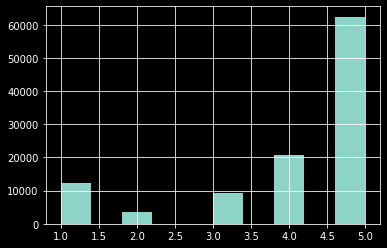

In [35]:
olist['review_score'].hist()

<AxesSubplot:>

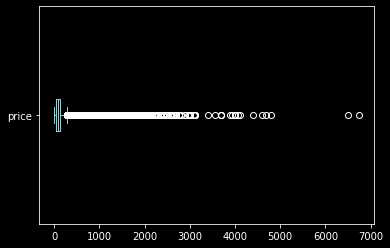

In [36]:
olist['price'].plot.box(vert=False)

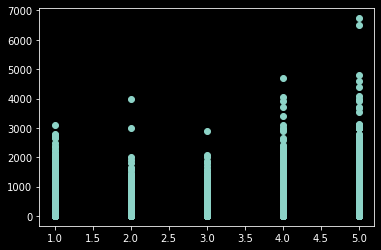

In [81]:
plt.scatter(olist['review_score'], olist['price'])

In [38]:
olist_bak = olist.copy()

## Features Engineering & Cleaning

In [39]:
olist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108463 entries, 0 to 114091
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_unique_id             108463 non-null  object        
 1   customer_city                  108463 non-null  object        
 2   order_purchase_timestamp       108463 non-null  datetime64[ns]
 3   order_approved_at              108463 non-null  datetime64[ns]
 4   order_delivered_carrier_date   108463 non-null  datetime64[ns]
 5   order_delivered_customer_date  108463 non-null  datetime64[ns]
 6   order_estimated_delivery_date  108463 non-null  datetime64[ns]
 7   shipping_limit_date            108463 non-null  datetime64[ns]
 8   price                          108463 non-null  float64       
 9   freight_value                  108463 non-null  float64       
 10  review_score                   108463 non-null  float64       
 11  

### Product Size and Weight 

In [40]:
#  product size category
slices = ['0', '1', '2', '3', '4', '5']

c, bins = pd.qcut(olist['product_volume'], len(slices), labels=slices, retbins=True)
olist['product_volume']=c.values

c, bins = pd.qcut(olist['product_weight_g'], len(slices), labels=slices, retbins=True)
olist['product_weight'] = c.values

In [41]:
olist.drop('product_weight_g', axis=1, inplace=True)

In [80]:

# pd.crosstab(olist['product_volume'], olist['product_weight']).plot(kind='bar', stacked=False, figsize=(5,5))
# pd.crosstab(olist['product_weight'], olist['review_score']).plot(kind='bar', stacked=False, figsize=(5,5))
# pd.crosstab(olist['product_volume'], olist['review_score']).plot(kind='bar', stacked=False, figsize=(5,5))

### Order timestamps & delays

In [43]:
from datetime import datetime

# olist['payment_approval_delay'] = (olist['order_approved_at'] - olist['order_purchase_timestamp']).dt.days
olist['carrier_shipping_delay'] = (olist['order_delivered_customer_date'] - olist['order_delivered_carrier_date']).dt.days
olist['delivery_estimation_precision'] = ((olist['order_delivered_customer_date'] - olist['order_estimated_delivery_date']).dt.days) < 0
# olist['delivery_total_delay'] =( olist['order_delivered_customer_date'] - olist['order_purchase_timestamp']).dt.days
olist['review_delay_after_delivery'] = ((olist['review_creation_date'] - olist['order_delivered_customer_date']).dt.days) >= 0
# olist['review_delay_after_purchase'] = (olist['review_creation_date'] - olist['order_purchase_timestamp']).dt.days
# olist['review_made_before_delivery'] = olist['review_creation_date'].lt(olist['order_delivered_customer_date'])
olist['purchase_time_hist'] = np.round((np.datetime64(datetime.now()) - olist['order_purchase_timestamp']).dt.days, decimals=0)



In [44]:

olist.drop('order_approved_at', axis=1, inplace=True)
# olist.drop('order_purchase_timestamp', axis=1, inplace=True)
olist.drop('order_delivered_customer_date', axis=1, inplace=True)
olist.drop('order_delivered_carrier_date', axis=1, inplace=True)
olist.drop('order_estimated_delivery_date', axis=1, inplace=True)
olist.drop('review_creation_date', axis=1, inplace=True)
olist.drop('shipping_limit_date', axis=1, inplace=True)	  # don't need this one
# olist.drop('review_answer_timestamp', axis=1, inplace=True)	  # don't need this one ?? TODO check


### Customers

In [45]:
# get review score and price grouped by customer_Id (only one customer per order)
customer_basket = olist.groupby('customer_unique_id')[['price', 'review_score']]\
    .agg(['count', 'sum', 'mean'])\
    .sort_values(by=('price', 'count'), ascending=False)
print(customer_basket[('review_score','mean')].mean())
customer_basket

4.154445508733917


price                      review_score  \
                                 count      sum        mean        count   
customer_unique_id                                                         
d97b3cfb22b0d6b25ac9ed4e9c2d481b    24  1593.16   66.381667           24   
c8460e4251689ba205045f3ea17884a1    24  4080.00  170.000000           24   
4546caea018ad8c692964e3382debd19    21    31.80    1.514286           21   
c402f431464c72e27330a67f7b94d4fb    20  2000.00  100.000000           20   
0f5ac8d5c31de21d2f25e24be15bbffb    18  1252.35   69.575000           18   
...                                ...      ...         ...          ...   
5a67f586c461ff4fe70143d4938bc1a1     1   110.00  110.000000            1   
5a66e36a847a98dae73468778263cf81     1    75.66   75.660000            1   
5a6637b7f03edf22def5e269822d4326     1    19.90   19.900000            1   
5a64b3fb0a71caa68a2cc3ac67c3c6df     1    24.90   24.900000            1   
ffffd2657e2aad2907e67c3e9daecbeb     1    56.99   56.990000            1   

                                             
                                   sum mean  
customer_unique_id                           
d97b3cfb22b0d6b25ac9ed4e9c2d481b  24.0  1.0  
c8460e4251689ba205045f3ea17884a1  96.0  4.0  
4546caea018ad8c692964e3382debd19  21.0  1.0  
c402f431464c72e27330a67f7b94d4fb  20.0  1.0  
0f5ac8d5c31de21d2f25e24be15bbffb  90.0  5.0  
...                                ...  ...  
5a67f586c461ff4fe70143d4938bc1a1   4.0  4.0  
5a66e36a847a98dae73468778263cf81   5.0  5.0  
5a6637b7f03edf22def5e269822d4326   5.0  5.0  
5a64b3fb0a71caa68a2cc3ac67c3c6df   5.0  5.0  
ffffd2657e2aad2907e67c3e9daecbeb   5.0  5.0  

[91485 rows x 6 columns]

### Locations


In [46]:
# ensure cities coordinates are defined
print(olist['customer_city'].isin(geolocation['geolocation_city']).mean())
print(olist['seller_city'].isin(geolocation['geolocation_city']).mean())
# keep only those exists
olist = olist[olist['customer_city'].isin(geolocation['geolocation_city'])]
olist = olist[olist['seller_city'].isin(geolocation['geolocation_city'])]

0.9993822778274619
0.9857278518941943


In [47]:
# use customer and seller coordinates to compute the distance between them
olist['customer_lat'] = olist.customer_city.map(geolocation.set_index('geolocation_city')['geolocation_lat'])
olist['customer_lng'] = olist.customer_city.map(geolocation.set_index('geolocation_city')['geolocation_lng'])
olist['seller_lat'] = olist.seller_city.map(geolocation.set_index('geolocation_city')['geolocation_lng'])
olist['seller_lng'] = olist.seller_city.map(geolocation.set_index('geolocation_city')['geolocation_lng'])


olist['distance_btw_seller_customer'] = haversine_vectorize(olist['customer_lat'], olist['customer_lng'], olist['seller_lat'], olist['seller_lng'])

# slice the distances
slices = np.arange(20)
c, bins = pd.qcut(olist['distance_btw_seller_customer'], len(slices), labels=slices, retbins=True)
olist['distance_btw_seller_customer']=c.values


In [48]:

olist.drop(['customer_lat', 'customer_lng', 'seller_lat', 'seller_lng', 'customer_city', 'seller_city'], axis=1, inplace=True)


### Features Correlations


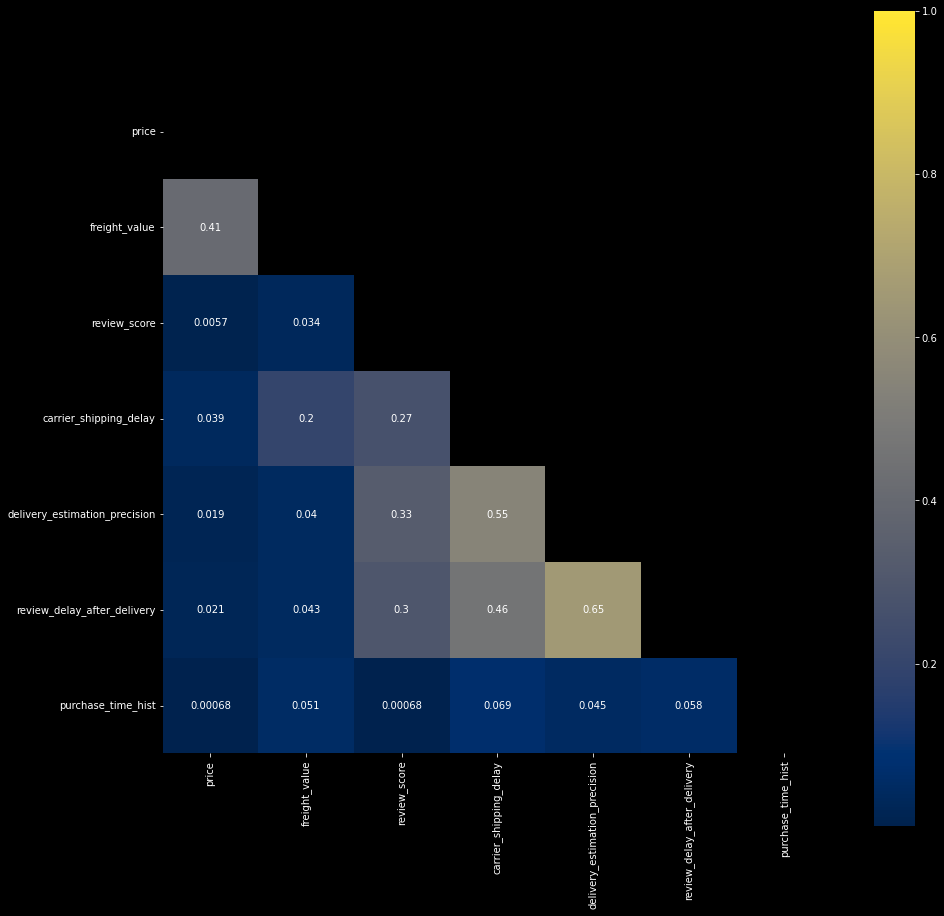

In [49]:
# features correlations
def show_feat_correlations(df):
	correlations = np.abs(df.select_dtypes(['float', 'int', 'bool']).corr(method="pearson"))

	mask = np.zeros_like(correlations)
	mask[np.triu_indices_from(mask)] = True
	sns.axes_style("white")
	plt.subplots(figsize=(15,15))
	sns.heatmap(correlations, mask=mask, vmax=1, square=True, xticklabels=correlations.columns, yticklabels=correlations.columns, annot=True, cmap='cividis')

show_feat_correlations(olist)

In [50]:
olist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106853 entries, 0 to 114091
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_unique_id             106853 non-null  object        
 1   order_purchase_timestamp       106853 non-null  datetime64[ns]
 2   price                          106853 non-null  float64       
 3   freight_value                  106853 non-null  float64       
 4   review_score                   106853 non-null  float64       
 5   product_category_name          106853 non-null  object        
 6   product_volume                 106853 non-null  category      
 7   product_weight                 106853 non-null  category      
 8   carrier_shipping_delay         106853 non-null  int64         
 9   delivery_estimation_precision  106853 non-null  bool          
 10  review_delay_after_delivery    106853 non-null  bool          
 11  

In [51]:
olist_bak = olist.copy()

## Modelisation

### Preparation

In [52]:
olist = olist_bak.copy()

In [65]:
olist.info()


<class 'pandas.core.frame.DataFrame'>
Index: 106853 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_purchase_timestamp       106853 non-null  datetime64[ns]
 1   price                          106853 non-null  float64       
 2   freight_value                  106853 non-null  float64       
 3   review_score                   106853 non-null  float64       
 4   product_volume                 106853 non-null  int8          
 5   product_weight                 106853 non-null  int8          
 6   carrier_shipping_delay         106853 non-null  int64         
 7   delivery_estimation_precision  106853 non-null  bool          
 8   review_delay_after_delivery    106853 non-null  bool          
 9   purchase_time_hist             106853 non-null  int64         
 10  distance_btw_sel

In [ ]:
# todo
# cumulated price per cutomer
# mean review, and last review, to give trend
# since when for last order




In [79]:
#cumulated value ber customer
olist.groupby('customer_unique_id')['price'].agg(['count', 'mean', 'sum', 'std']).reset_index().sort_values(by=('std'), ascending=False)

,customer_unique_id,count,mean,sum,std
76908,da122df9eeddfedc1dc1f5349a1a690c,2,3694.000,7388.00,1562.705986
31767,59d66d72939bc9497e19d89c61a96d5f,2,1729.500,3459.00,1231.072906
68182,c11f76d3806da64a4c64ea47627444e2,2,863.500,1727.00,1173.090150
43435,7b0eaf68a16e4808e5388c67345033c9,2,1119.210,2238.42,1032.078916
9735,1b76903617af13189607a36b0469f6f3,6,516.625,3099.75,971.528869
...,...,...,...,...,...
90157,fffb09418989a0dbff854a28163e47c6,1,58.000,58.00,NaN
90159,fffea47cd6d3cc0a88bd621562a9d061,1,64.890,64.89,NaN
90160,ffff371b4d645b6ecea244b27531430a,1,89.900,89.90,NaN
90161,ffff5962728ec6157033ef9805bacc48,1,115.000,115.00,NaN


In [ ]:
# mean review, last review
olist.sort(by=)

In [54]:
# won't need anymore this feature ?
# olist.drop('customer_unique_id', axis=1, inplace=True)

In [55]:
# convert categorical features
olist['product_volume'] = olist['product_volume'].cat.codes
olist['product_weight'] = olist['product_weight'].cat.codes
olist['distance_btw_seller_customer'] = olist['distance_btw_seller_customer'].cat.codes


In [56]:
# find the most common type of product bought for each customer
customer_product_cat_modes = olist.groupby('customer_unique_id')['product_category_name'].agg(pd.Series.mode).to_frame()
customer_product_cat_modes.groupby('customer_unique_id', sort=True).count()

,product_category_name
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,1
0000b849f77a49e4a4ce2b2a4ca5be3f,1
0000f46a3911fa3c0805444483337064,1
0000f6ccb0745a6a4b88665a16c9f078,1
0004aac84e0df4da2b147fca70cf8255,1
...,...
fffcf5a5ff07b0908bd4e2dbc735a684,1
fffea47cd6d3cc0a88bd621562a9d061,1
ffff371b4d645b6ecea244b27531430a,1


In [57]:
# assert indexes are unique
assert customer_product_cat_modes.index.nunique() == customer_product_cat_modes.shape[0]

In [58]:
olist.set_index('customer_unique_id', inplace=True)

In [59]:
#  TODO wip
# ensure olist index are unique, because we want only one customer present in the dataset
# assert olist.shape == olist.index.nunique()


In [60]:
# TODO wip : provide olist unique customer with his most common product category
olist = olist.drop('product_category_name', axis=1).join(customer_product_cat_modes)

In [61]:

olist.groupby('customer_unique_id', as_index=True)\
    .mean()\
    # .reset_index()
    # .round(decimals=0)\
    # .agg(['mean'])\
    # .sort_values(by='price', ascending=False)\
    # .agg({'price': 'count', 'price': 'mean'})\

# olist_by_customers.drop([('price', 'count')], axis=1)

,price,freight_value,review_score,product_volume,product_weight,carrier_shipping_delay,delivery_estimation_precision,review_delay_after_delivery,purchase_time_hist,distance_btw_seller_customer
customer_unique_id,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,129.90,12.00,5.0,3.0,4.0,4.0,1.0,1.0,1401.0,8.0
0000b849f77a49e4a4ce2b2a4ca5be3f,18.90,8.29,4.0,2.0,1.0,1.0,1.0,1.0,1404.0,5.0
0000f46a3911fa3c0805444483337064,69.00,17.22,3.0,5.0,4.0,23.0,1.0,1.0,1826.0,0.0
0000f6ccb0745a6a4b88665a16c9f078,25.99,17.63,4.0,0.0,0.0,19.0,1.0,1.0,1610.0,19.0
0004aac84e0df4da2b147fca70cf8255,180.00,16.89,5.0,0.0,5.0,11.0,1.0,1.0,1577.0,3.0
...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,785.00,248.71,5.0,5.0,5.0,12.0,1.0,1.0,1736.0,19.0
fffea47cd6d3cc0a88bd621562a9d061,64.89,19.69,4.0,5.0,4.0,19.0,1.0,1.0,1551.0,18.0
ffff371b4d645b6ecea244b27531430a,89.90,22.56,5.0,1.0,2.0,14.0,1.0,1.0,1858.0,17.0


In [62]:
# convert product category with its string representation, required for model computation
olist['product_category_name'] = olist['product_category_name'].astype(str)

In [63]:

from sklearn.preprocessing import LabelEncoder
olist['product_category_name'] = LabelEncoder().fit_transform(olist['product_category_name'])


In [64]:
assert olist.select_dtypes('category').shape[1] == 0
assert olist.select_dtypes(exclude=['category']).shape[1] == olist.shape[1]-1

# ensure no empty values remains
assert olist[olist.isna().any(axis=1)].shape[0] == 0

AssertionError: 

In [ ]:
olist.info()

<class 'pandas.core.frame.DataFrame'>
Index: 106853 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_purchase_timestamp       106853 non-null  datetime64[ns]
 1   price                          106853 non-null  float64       
 2   freight_value                  106853 non-null  float64       
 3   review_score                   106853 non-null  float64       
 4   product_volume                 106853 non-null  int8          
 5   product_weight                 106853 non-null  int8          
 6   payment_approval_delay         106853 non-null  int64         
 7   carrier_shipping_delay         106853 non-null  int64         
 8   delivery_estimation_precision  106853 non-null  int64         
 9   review_delay_after_delivery    106853 non-null  int64         
 10  review_delay_aft

In [ ]:
olist.head()

,order_purchase_timestamp,price,freight_value,review_score,product_volume,product_weight,payment_approval_delay,carrier_shipping_delay,delivery_estimation_precision,review_delay_after_delivery,review_delay_after_purchase,review_made_before_delivery,purchase_time_hist,distance_btw_seller_customer,product_category_name
customer_unique_id,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,129.90,12.00,5.0,3,4,0,4,-5,0,6,False,1401,8,468
0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,18.90,8.29,4.0,2,1,0,1,-5,0,3,False,1404,5,466
0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,69.00,17.22,3.0,5,4,0,23,-2,0,26,False,1826,0,514
0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,25.99,17.63,4.0,0,0,0,19,-12,0,20,False,1610,19,525
0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,180.00,16.89,5.0,0,5,0,11,-8,0,13,False,1577,3,525


In [ ]:
olist_bak2 = olist.copy()

### Raw KMeans 

In [ ]:
olist=olist_bak2.copy()

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import davies_bouldin_score
from sklearn.pipeline import Pipeline, make_pipeline


size = 2000

olist_labels = olist.sort_values('order_purchase_timestamp', ascending=True)\
        .sample(size, random_state=0)

# we remove review score since it would be a feature to predict in the future, will be our 'label'
# and remove some features to manually check their weight in the model
olist_light = olist_labels\
    # .drop('product_category_name', axis=1)\
    # .drop('review_made_before_delivery', axis=1)\
    # .drop('payment_approval_delay', axis=1)\
    # .drop('carrier_shipping_delay', axis=1)\
    # .drop('delivery_estimation_precision', axis=1)\
    # .drop('review_delay_after_delivery', axis=1)\
    # .drop('review_delay_after_purchase', axis=1)\
    # .drop('purchase_time_hist', axis=1)\
    # .drop('distance_btw_seller_customer', axis=1)\
    # .drop('product_volume', axis=1)\
    # .drop('product_weight', axis=1)\
    # .drop('freight_value', axis=1)
    # .drop('review_score', axis=1)\

numerical_features = olist_light\
    .drop('order_purchase_timestamp', axis=1)\
    .select_dtypes(exclude=['category', 'bool', 'object', 'datetime']).columns

categorical_features = olist_light.select_dtypes(include=['object']).columns


preprocessor = ColumnTransformer([
    ('scaler', MinMaxScaler(), numerical_features),
    # ('label', OrdinalEncoder(), categorical_features)
])


In [ ]:
categorical_features

Index([], dtype='object')

In [ ]:
numerical_features

Index(['price', 'freight_value', 'review_score', 'product_volume',
       'product_weight', 'payment_approval_delay', 'carrier_shipping_delay',
       'delivery_estimation_precision', 'review_delay_after_delivery',
       'review_delay_after_purchase', 'purchase_time_hist',
       'distance_btw_seller_customer', 'product_category_name'],
      dtype='object')

In [ ]:
olist_light.head()

,order_purchase_timestamp,price,freight_value,review_score,product_volume,product_weight,payment_approval_delay,carrier_shipping_delay,delivery_estimation_precision,review_delay_after_delivery,review_delay_after_purchase,review_made_before_delivery,purchase_time_hist,distance_btw_seller_customer,product_category_name
customer_unique_id,,,,,,,,,,,,,,,
8f5c7b4a8c8d553a261e435fcd2d1863,2017-08-02 21:20:58,31.90,12.48,1.0,1,0,0,11,8,-7,21,True,1681,15,499
572a2a7bca60d77e596287ea324a4680,2018-05-02 12:17:35,100.00,16.67,5.0,3,5,1,7,-11,0,9,False,1409,9,467
5610b0083f65fb633e300f6a55916292,2018-02-19 14:02:29,19.50,16.79,5.0,2,0,0,14,-9,0,19,False,1480,18,485
0b39f417a3c099ff0497346258e8d752,2018-08-10 21:14:35,44.99,22.25,5.0,3,2,0,7,-9,-1,10,True,1308,17,487
01b3e064c4fc4372a269bdc02c131850,2018-08-27 21:27:13,274.90,26.90,5.0,5,5,0,1,-2,0,2,False,1291,6,468


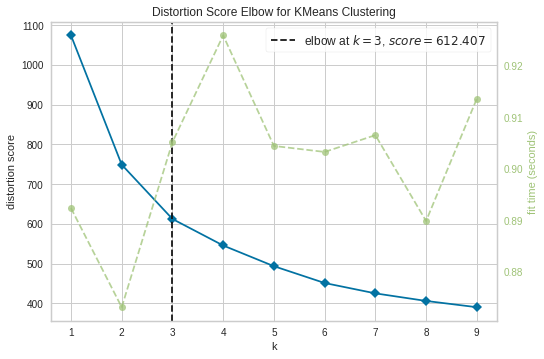

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

from sklearn.datasets import make_blobs

# visualizer = KElbowVisualizer(KMeans(), k=(1,10))

visualizer = Pipeline([
    ("preprocessor", preprocessor),
    ("kelbowvisualizer", KElbowVisualizer(KMeans(), k=(1,10)) )
])

visualizer.fit(olist_light)
visualizer.named_steps['kelbowvisualizer'].show()
elbow_score = visualizer.named_steps['kelbowvisualizer'].elbow_value_


In [ ]:


model = Pipeline([
    ("preprocessor", preprocessor),
    ("kmeans", KMeans(elbow_score ))
])
model.fit(olist_light)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', MinMaxScaler(),
                                                  Index(['price', 'freight_value', 'review_score', 'product_volume',
       'product_weight', 'payment_approval_delay', 'carrier_shipping_delay',
       'delivery_estimation_precision', 'review_delay_after_delivery',
       'review_delay_after_purchase', 'purchase_time_hist',
       'distance_btw_seller_customer', 'product_category_name'],
      dtype='object'))])),
                ('kmeans', KMeans(n_clusters=3))])

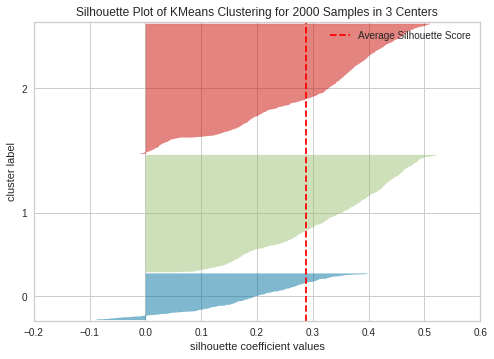

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 2000 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

silouhette_visualizer = Pipeline([
    ("preprocessor", preprocessor),
    ("silhouettevisualizer", SilhouetteVisualizer(model.named_steps['kmeans'], colors='yellowbrick'))
])

# silouhette_visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

silouhette_visualizer.fit(olist_light)
silouhette_visualizer.named_steps['silhouettevisualizer'].show()


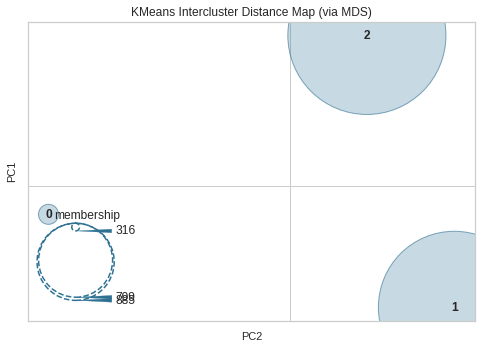

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [ ]:
from yellowbrick.cluster import InterclusterDistance

intercluster = Pipeline([
    ("preprocessor", preprocessor),
    ("intercluster", InterclusterDistance(model.named_steps['kmeans']))
])

intercluster.fit(olist_light)
intercluster.named_steps['intercluster'].show()


In [ ]:
# apply labels to dataset
kmeans_labels = model.named_steps['kmeans'].labels_
olist_light['cluster_label'] = kmeans_labels

In [ ]:
# group by labels and set average values for each cluster
olist_clustered = olist_labels.drop('product_category_name', axis=1).groupby('cluster_label').mean().reset_index()
olist_clustered

,cluster_label,price,freight_value,review_score,product_volume,product_weight,payment_approval_delay,carrier_shipping_delay,delivery_estimation_precision,review_delay_after_delivery,review_delay_after_purchase,review_made_before_delivery,purchase_time_hist,distance_btw_seller_customer
0,0,119.320190,20.781804,1.382911,2.718354,2.734177,0.291139,14.936709,-5.829114,-2.806962,16.553797,0.294304,1525.174051,10.512658
1,1,78.005144,15.968761,4.581977,0.966208,0.931164,0.237797,8.086358,-12.934919,-0.182728,11.052566,0.057572,1512.634543,9.429287
2,2,156.536294,22.885525,4.638418,3.845198,3.854237,0.270056,7.820339,-13.025989,-0.159322,11.175141,0.035028,1546.325424,9.588701


In [ ]:
# prepare data for visualization, need to scale numerical features
olist_clustered_scaled = preprocessing.StandardScaler().fit_transform(olist_clustered.drop(['cluster_label'], axis=1))
olist_clustered = pd.DataFrame(olist_clustered_scaled, columns = olist_clustered.drop(['cluster_label'], axis=1).columns)

In [ ]:
olist_clustered.T

,0,1,2
price,0.042598,-1.245488,1.202890
freight_value,0.311947,-1.350552,1.038605
review_score,-1.414051,0.688478,0.725573
product_volume,0.175961,-1.303208,1.127247
product_weight,0.189056,-1.308280,1.119224
payment_approval_delay,1.130961,-1.300800,0.169839
carrier_shipping_delay,1.413445,-0.666340,-0.747104
delivery_estimation_precision,1.414128,-0.693557,-0.720570
review_delay_after_delivery,-1.414172,0.697668,0.716504
review_delay_after_purchase,1.413944,-0.730867,-0.683077


In [ ]:
import plotly.express as px

labels=olist_clustered.T.index.values
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
values = pd.DataFrame(olist_clustered.T.values)
# print(labels)
# print(angles)
# print(values)

print(values.columns)


fig = px.line_polar(values, r=values[0], theta=labels, line_close=True)
fig.update_traces(fill='toself')
fig.show()



RangeIndex(start=0, stop=3, step=1)


### Apply PCA

computing PCA dimension reduction on range(0, 13) features
cumulated variance explined by PCA: [0.39347116 0.60718068 0.77747207 0.86518935 0.91577117 0.95085468
 0.96770341 0.98005175 0.98992575 0.99521375 0.99870805 0.99987495
 1.        ]


([<matplotlib.axis.XTick at 0x7f8d683ef850>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

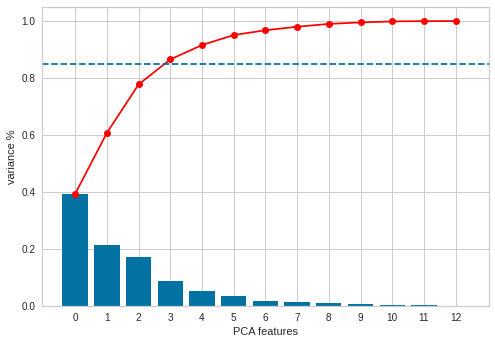

In [ ]:
from sklearn import decomposition

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("pca", decomposition.PCA(svd_solver='full'))
])

pipeline.fit(olist_light)
olist_projected = pd.DataFrame(pipeline.transform(olist_light))
pca = pipeline.named_steps['pca']


features = range(pca.n_components_)
print(f'computing PCA dimension reduction on {features} features')
cumulated = np.cumsum(pca.explained_variance_ratio_)
print(f'cumulated variance explined by PCA: {cumulated}')
plt.bar(features, pca.explained_variance_ratio_)
plt.plot(features, cumulated, marker='o', c='red')
plt.axhline(y=0.85, linestyle='--')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)


In [ ]:
# We choose 3 components in order to explain 85% of variance
n_pca = 3

In [ ]:
import plotly.express as px

fig = px.scatter_matrix(
    olist_projected,
    labels=olist_projected.columns,
    dimensions=range(n_pca),
    # color=olist_light['review_score']
)
fig.update_traces(diagonal_visible=False)
fig.show()

/home/vincent/devel/vjuge/oc-iml/venv/lib64/python3.9/site-packages/pandas/core/indexes/base.py:4616: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



In [ ]:
olist_projected.columns = olist_projected.columns.astype(str)

fig = px.scatter_3d(
    olist_projected, x='0', y='1', z='2', color='3',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'},
    # width=15, height=15
)
fig.show()

### Kmeans Refined

In [ ]:
olist_projected = olist_projected.iloc[:,:3]
olist_projected

,0,1,2
0,-0.499025,0.865096,-0.029799
1,0.394632,-0.249232,-0.042550
2,-0.446054,-0.052032,-0.473025
3,-0.034039,-0.103468,-0.425765
4,0.668913,-0.327462,0.116704
...,...,...,...
1995,-0.597224,-0.076507,-0.368359
1996,0.399510,-0.206869,-0.226491
1997,-0.416277,0.369783,-0.175445
1998,0.276263,0.056301,-0.164974


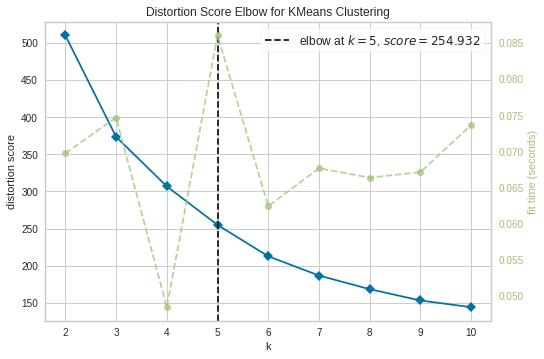

In [ ]:

visualizer_pca = Pipeline([
    ("kelbowvisualizer", KElbowVisualizer(KMeans(),K=(1,12)))])

visualizer_pca.fit(olist_projected)
visualizer_pca.named_steps['kelbowvisualizer'].show()
elbow_score = visualizer_pca.named_steps['kelbowvisualizer'].elbow_value_

model = KMeans(elbow_score)

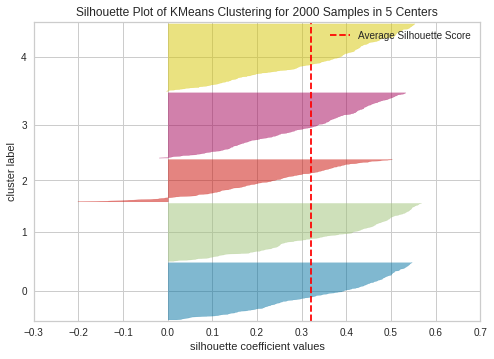

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 2000 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:

silouhette_visualizer_pca = Pipeline([
    ("silhouettevisualizer", SilhouetteVisualizer(model, colors='yellowbrick'))
])

# SilhouetteVisualizer(model, colors='yellowbrick')

silouhette_visualizer_pca.fit(olist_projected)
silouhette_visualizer_pca.named_steps['silhouettevisualizer'].show()


/home/vincent/devel/vjuge/oc-iml/venv/lib64/python3.9/site-packages/sklearn/base.py:441: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



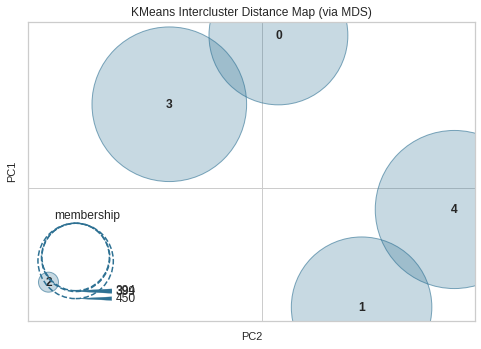

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [ ]:
intercluster_pca = Pipeline([
    ("intercluster", InterclusterDistance(model))
])

intercluster_pca.fit(olist_projected)
intercluster_pca.named_steps['intercluster'].show()

In [ ]:
# apply labels to dataset
kmeans_labels = model.labels_

olist_labels['cluster_label'] = kmeans_labels

In [ ]:
# average values for each cluster

olist_clustered = olist_labels.groupby('cluster_label').mean().reset_index()
olist_clustered

,cluster_label,price,freight_value,review_score,product_volume,product_weight,payment_approval_delay,carrier_shipping_delay,delivery_estimation_precision,review_delay_after_delivery,review_delay_after_purchase,review_made_before_delivery,purchase_time_hist,distance_btw_seller_customer,product_category_name
0,0,158.472513,20.585939,4.573604,4.210660,4.134518,0.296954,6.284264,-12.246193,-0.421320,9.479695,0.035533,1542.345178,4.974619,487.611675
1,1,82.499649,18.948772,4.503759,0.922306,0.914787,0.243108,10.689223,-13.360902,-0.433584,13.325815,0.082707,1512.568922,14.699248,489.000000
2,2,117.676473,20.721233,1.273973,2.746575,2.760274,0.291096,15.051370,-5.650685,-2.928082,16.599315,0.301370,1523.250000,10.287671,480.582192
3,3,159.888022,26.022044,4.622222,3.646667,3.775556,0.248889,9.706667,-13.488889,-0.071111,13.086667,0.040000,1550.657778,14.382222,483.742222
4,4,79.353204,13.221161,4.627957,1.212903,1.118280,0.236559,5.587097,-12.535484,0.111828,8.954839,0.036559,1516.696774,4.389247,488.002151


In [ ]:
# prepare data for visualization
olist_clustered_scaled = preprocessing.StandardScaler().fit_transform(olist_clustered.drop('cluster_label', axis=1))

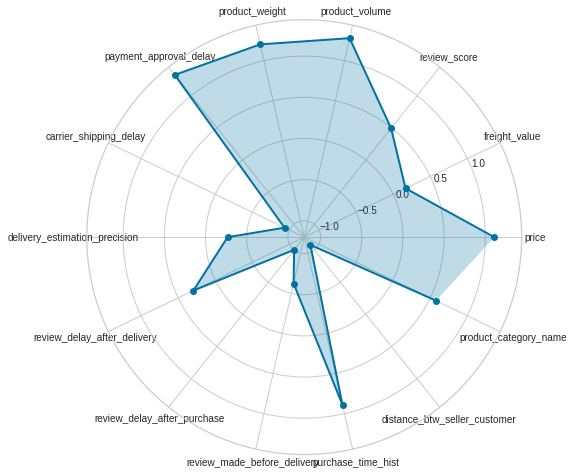

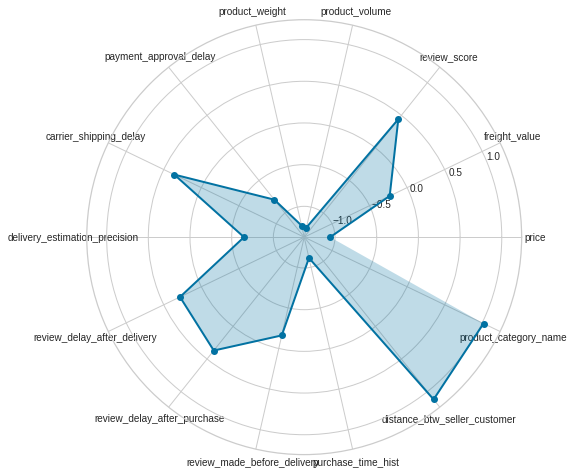

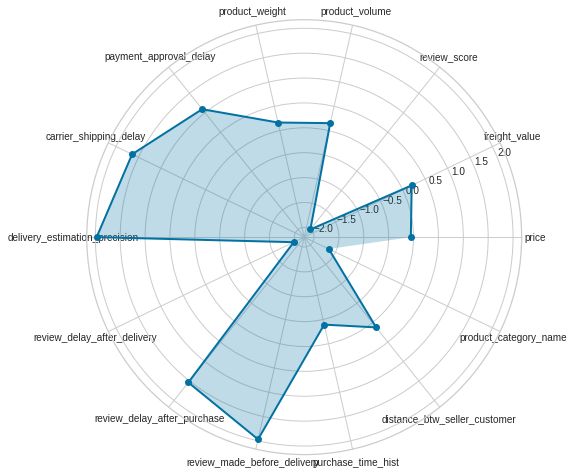

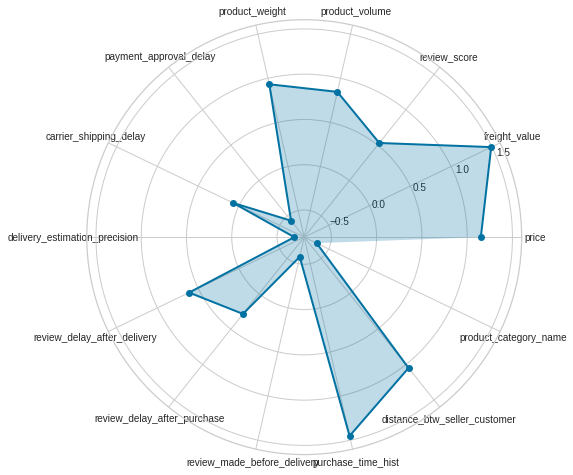

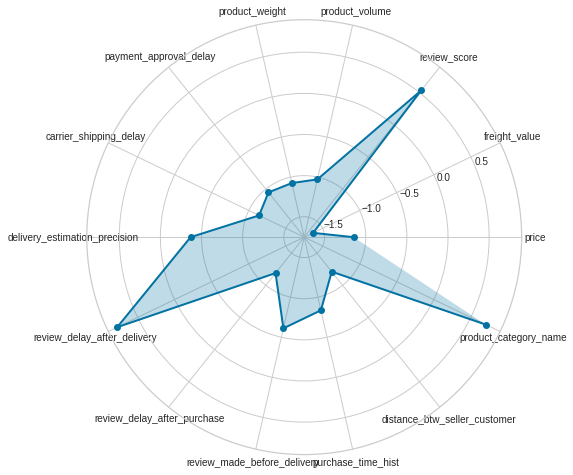

In [ ]:
labels=olist_clustered.drop('cluster_label', axis=1).columns.values
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)

for row in olist_clustered_scaled:
	fig=plt.figure(figsize=(8,8))
	ax = fig.add_subplot(111, polar=True)
	ax.plot(angles, row, 'o-', linewidth=2)
	ax.fill(angles, row, alpha=0.25)
	ax.set_thetagrids(angles * 180/np.pi, labels)
	ax.grid(True)



## Stability

In [ ]:
# provide several olist datasets
# compute and slice the dataset per equal slices (10)

# TODO wip
# olist['purchase_time_hist_offset'] = (olist['purchase_time_hist'] - (olist['purchase_time_hist'].max())).abs()
olist['slice'] = pd.qcut(olist['price'], 10, labels=[str(i) for i in range(10)], retbins=True)[0]


In [ ]:

olist_ari = olist.drop(['purchase_time_hist', 'order_purchase_timestamp'], axis=1)
olist_ari.info()

<class 'pandas.core.frame.DataFrame'>
Index: 106853 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   price                          106853 non-null  float64 
 1   freight_value                  106853 non-null  float64 
 2   review_score                   106853 non-null  float64 
 3   product_volume                 106853 non-null  int8    
 4   product_weight                 106853 non-null  int8    
 5   payment_approval_delay         106853 non-null  int64   
 6   carrier_shipping_delay         106853 non-null  int64   
 7   delivery_estimation_precision  106853 non-null  int64   
 8   review_delay_after_delivery    106853 non-null  int64   
 9   review_delay_after_purchase    106853 non-null  int64   
 10  review_made_before_delivery    106853 non-null  bool    
 11  distance_btw_seller_custom

In [ ]:
# minimal size of bin
min_samples = olist_ari.groupby('slice').count().reset_index().min()[1]
min_samples

10357

In [ ]:
# olist[olist['purchase_time_hist_slice'] == '0'].drop('purchase_time_hist_slice', axis=1)

In [ ]:

numerical_features = olist_ari.select_dtypes(exclude=['category', 'bool', 'object', 'datetime']).columns

categorical_features = olist_ari.select_dtypes(include=['object']).columns

olist_ari['product_category_name'] = preprocessing.LabelEncoder().fit_transform(olist_ari['product_category_name'])

preprocessor = ColumnTransformer([
    ('scaler', MinMaxScaler(), numerical_features),
    # ('label', OrdinalEncoder(), categorical_features)
])


In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score as ari 

# our reference is the range 0
kmeans_ref = Pipeline([
    ("preprocessor", preprocessor),
    ("kmeans", KMeans(4, random_state=1))])

ref_olist_ari = olist_ari[olist_ari['slice'] == '0'].drop('slice', axis=1).iloc[:min_samples]
kmeans_ref.fit(ref_olist_ari)
ref_labels = kmeans_ref.named_steps['kmeans'].labels_

ref_labels = ref_labels[:min_samples]


In [ ]:

# compute kmeans for all other slices
ari_array = []

for i in range(1, 10):
    kmeans_p = Pipeline([
        ("preprocessor", preprocessor),
        ("kmeans", KMeans(4, random_state=0))])
    p_olist_ari = olist_ari[olist_ari['slice'] == str(i)].drop('slice', axis=1).iloc[:min_samples]
    kmeans_p.fit(p_olist_ari)
    p_labels = kmeans_p.named_steps['kmeans'].labels_
    # or without re fitting the model, but gives exact same result ! :(
    # p_labels = kmeans_ref.predict(olist[olist['purchase_time_hist_slice'] == str(i)].drop('purchase_time_hist_slice', axis=1))
    p_labels = p_labels[:min_samples]
    ari_array.append(ari(np.sort(ref_labels), np.sort(p_labels)))

print(ari_array)


[0.7003652276887564, 0.6411257337183864, 0.4335894559114611, 0.6281879456939721, 0.7242674154783141, 0.6868790809686293, 0.7505889035129554, 0.6150773006120703, 0.8182838345397925]


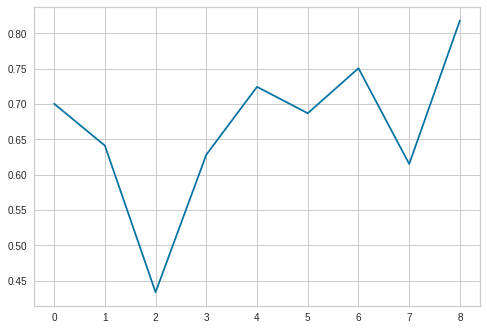

In [ ]:

plt.plot(ari_array)

# *** WIP APPENDIX ***

In [ ]:

olist_timed = olist.groupby(pd.Grouper(key='order_purchase_timestamp', freq='1m'))\
    .agg(count='count')\
    .filter(lambda x: x['price'].count() > 2500)\
    .count().sort_values('price', ascending=True)
olist_timed.groups
type(olist_timed)
olist_timed

TypeError: Must provide 'func' or tuples of '(column, aggfunc).

In [ ]:
data = {}

# print(olist.shape[0])
for name, subdf in olist_timed:
    if (subdf.shape[0] < 3000):
        print (f"passing {name} with {subdf.shape[0]} elements")
        continue
    print(f"using {name} with {subdf.shape[0]} elements" )
    data[name] = subdf
# on peut drop les lignes trop anciennes

passing 2016-09-30 00:00:00 with 3 elements
passing 2016-10-31 00:00:00 with 317 elements
passing 2016-11-30 00:00:00 with 0 elements
passing 2016-12-31 00:00:00 with 1 elements
passing 2017-01-31 00:00:00 with 887 elements
passing 2017-02-28 00:00:00 with 1759 elements
passing 2017-03-31 00:00:00 with 2759 elements
passing 2017-04-30 00:00:00 with 2443 elements
using 2017-05-31 00:00:00 with 3838 elements
using 2017-06-30 00:00:00 with 3352 elements
using 2017-07-31 00:00:00 with 4293 elements
using 2017-08-31 00:00:00 with 4653 elements
using 2017-09-30 00:00:00 with 4606 elements
using 2017-10-31 00:00:00 with 5055 elements
using 2017-11-30 00:00:00 with 8205 elements
using 2017-12-31 00:00:00 with 5956 elements
using 2018-01-31 00:00:00 with 7748 elements
using 2018-02-28 00:00:00 with 7380 elements
using 2018-03-31 00:00:00 with 7764 elements
using 2018-04-30 00:00:00 with 7598 elements
using 2018-05-31 00:00:00 with 7652 elements
using 2018-06-30 00:00:00 with 6861 elements
using